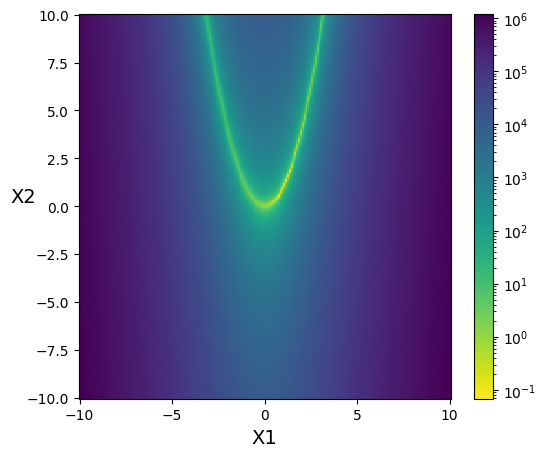

initial fval: 4900.0000
iter   1 - fval: 119.3775
iter   2 - fval: 2.7829
iter   3 - fval: 2.7822
iter   4 - fval: 2.7819
iter   5 - fval: 2.7808
iter   6 - fval: 2.7784
iter   7 - fval: 2.7717
iter   8 - fval: 2.7548
iter   9 - fval: 2.7150
iter  10 - fval: 2.6417
iter  11 - fval: 2.5263
iter  12 - fval: 2.2811
iter  13 - fval: 1.8599
iter  14 - fval: 1.5437
iter  15 - fval: 1.1542
iter  16 - fval: 0.9849
iter  17 - fval: 0.8905
iter  18 - fval: 0.6474
iter  19 - fval: 0.5013
iter  20 - fval: 0.3446
iter  21 - fval: 0.2530
iter  22 - fval: 0.2189
iter  23 - fval: 0.1172
iter  24 - fval: 0.0974
iter  25 - fval: 0.0561
iter  26 - fval: 0.0329
iter  27 - fval: 0.0174
iter  28 - fval: 0.0111
iter  29 - fval: 0.0042
iter  30 - fval: 0.0010
iter  31 - fval: 0.0004
iter  32 - fval: 0.0000
iter  33 - fval: 0.0000
iter  34 - fval: 0.0000
iter  35 - fval: 0.0000
iter  36 - fval: 0.0000
A non-descent direction was encountered.
         Current function value: 0.000000
         Iterations: 37
   

/Users/becker/Programs/Torche/.venv/lib/python3.12/site-packages/torch/autograd/__init__.py:411: UserWarning: Skipping device NVIDIA GeForce GTX 675MX that does not support Metal 2.0 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSDevice.mm:101.)
  result = Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch

from torchmin import minimize
from torchmin.benchmarks import rosen
x, y = torch.meshgrid(
    torch.linspace(-10,10,200),
    torch.linspace(-10,10,200)
)
xy = torch.stack([x, y], -1)
z = rosen(xy, reduce=False)

fig, ax = plt.subplots(figsize=(6,5))
c = ax.pcolormesh(x, y, z, shading='auto', cmap='viridis_r',
                  norm=LogNorm(vmin=z.min(), vmax=z.max()))
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14, rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.5)
fig.colorbar(c, ax=ax)
plt.show()
x0 = torch.tensor([1., 8.])

rosen(x0)
# BFGS
res = minimize(
    rosen, x0,
    method='bfgs',
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: {}'.format(res.x))